In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import os

In [6]:
!pip install tensorflow-gpu==2.0.0.alpha0; #installing tensorflow versino 2.0.0

In [7]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
    )
#check version of tensorflow

2.0.0-alpha0


True

In [8]:
# used to mount google drive to access files, click the link and copy and paste in the box below.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# providing path and defining classes
directory = '/content/drive/My Drive/Deep Learning/train'
test_directory = '/content/drive/My Drive/Deep Learning/test/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [0]:
# assigning default shape to image
img_size = 240

In [0]:
import cv2
import matplotlib.pyplot as plt

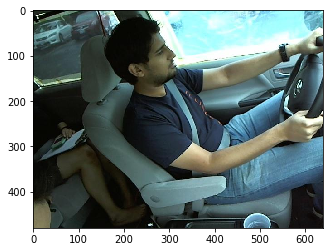

In [12]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

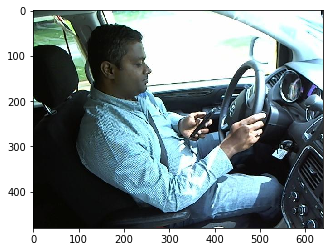

In [21]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [22]:
# check image size using shape.
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


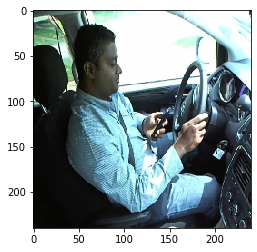

In [23]:
# creating new image with resize functionality
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [0]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size,img_size))
            training_data.append([new_img,class_num])

In [0]:
create_training_data()

In [26]:
print(len(training_data))

22424


In [0]:
random.shuffle(training_data)
x = []
y = []

In [0]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [29]:
len(x),len(y)

(22424, 22424)

In [30]:
x[0].shape

(240, 240, 3)

In [31]:
x = np.array(x).reshape(-1,img_size,img_size,3)
x[0].shape

(240, 240, 3)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=96)

In [0]:
del x,y

In [34]:
import gc
gc.collect()

0

In [0]:
from tensorflow.keras import utils

In [0]:
Y_train = utils.to_categorical(y_train,num_classes=10)
Y_test = utils.to_categorical(y_test,num_classes=10)

In [0]:
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [0]:
model = models.Sequential()
## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      1

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]
batch_size = 70
n_epochs = 15

In [41]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test),
                    callbacks=callback)

Train on 15696 samples, validate on 6728 samples
Epoch 1/15
15696/15696 [==============================] - 79s 5ms/sample - loss: 0.7373 - accuracy: 0.7692 - val_loss: 0.3357 - val_accuracy: 0.8967
Epoch 2/15
15696/15696 [==============================] - 69s 4ms/sample - loss: 0.1254 - accuracy: 0.9611 - val_loss: 0.0660 - val_accuracy: 0.9784
Epoch 3/15
15696/15696 [==============================] - 69s 4ms/sample - loss: 0.0784 - accuracy: 0.9753 - val_loss: 0.0405 - val_accuracy: 0.9894
Epoch 4/15
15696/15696 [==============================] - 69s 4ms/sample - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.0837 - val_accuracy: 0.9789
Epoch 5/15
15696/15696 [==============================] - 69s 4ms/sample - loss: 0.0539 - accuracy: 0.9825 - val_loss: 0.0509 - val_accuracy: 0.9857
Epoch 6/15
15696/15696 [==============================] - 69s 4ms/sample - loss: 0.0472 - accuracy: 0.9843 - val_loss: 0.0806 - val_accuracy: 0.9782
Epoch 7/15
15696/15696 [==============================] -

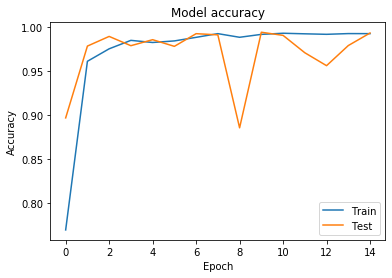

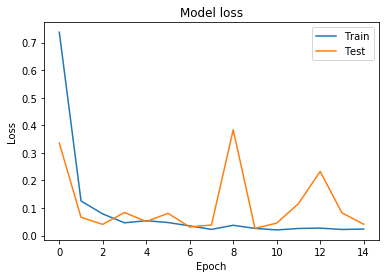

In [42]:
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
pred= model.predict_classes(x_test) # predict

In [45]:
!pip install scikit-plot

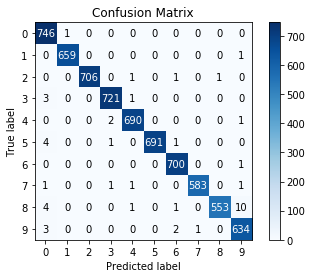

In [46]:
# Confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

In [49]:
# Classification Report
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       747
           1       1.00      1.00      1.00       660
           2       1.00      1.00      1.00       709
           3       0.99      0.99      0.99       725
           4       0.99      1.00      0.99       693
           5       1.00      0.99      1.00       697
           6       0.99      1.00      1.00       701
           7       1.00      0.99      1.00       587
           8       1.00      0.97      0.98       569
           9       0.98      0.99      0.98       640

    accuracy                           0.99      6728
   macro avg       0.99      0.99      0.99      6728
weighted avg       0.99      0.99      0.99      6728



In [0]:
#    Class Definitions
#    c0: safe driving
#    c1: texting - right
#    c2: talking on the phone - right
#    c3: texting - left
#    c4: talking on the phone - left
#    c5: operating the radio
#    c6: drinking
#    c7: reaching behind
#    c8: hair and makeup
#    c9: talking to passenger

/content/drive/My Drive/Deep Learning/test/img_84914.jpg
Prediction : [8]


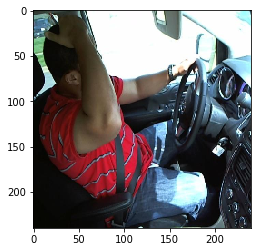

In [54]:
# Testing using random image
random_filename = random.choice([
    x for x in os.listdir(test_directory)
    if os.path.isfile(os.path.join(test_directory, x))])
random_filename=test_directory+random_filename
print(random_filename)
img_array = cv2.imread(random_filename,cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
new_img = cv2.resize(RGB_img,(img_size,img_size))
print('Prediction : {}'.format(model.predict_classes(new_img.reshape(-1,img_size,img_size,3))))
plt.imshow(new_img)
plt.show()

In [0]:
# Saving weights
model.save_weights('/content/drive/My Drive/Deep Learning/driverdistraction_lr_weights.h5', overwrite=True)

In [0]:
#saving model
model.save('/content/drive/My Drive/Deep Learning/driverdistraction.h5')